# Python（＆Colaboratory）の基礎
2019/11/20 ver.  
ここでは、データ分析を前提としたPythonの使い方を学びます。

すでに他の言語でプログラミング経験のある方には、わかりきっている内容もあると思いますが、Python独自の考え方やお作法もありますので、油断せずにトライしてください。

反面、プログラミング経験があまりない方にとっては、いきなりの演習で難しく感じるところもあると思いますが、まずは細かい文法などはあまり気にせずに「とりあえず、こんなことをしているんだな」といった概要を掴むように努力してみましょう。


## 開発環境の確認
今回の演習はすべて**Google Colaboratory**で行います。

### Google Colaboratoryとは
 Googleが無償で提供しているインストール不要ですぐに使えるブラウザベースのPython実行環境です。Jupyterというオープンソースから派生した実行環境がベースになっています。連続使用時間やファイルのアップロードに制限はありますが、機械学習や深層学習を行うことも可能です。

### Pythonとは
Pythonとはプログラミング言語の１つで、以下のような特徴があります。

- 初心者向きで習得しやすい
- シンプルなコードで読みやすい
- 計算・統計処理で使用できるライブラリが豊富


人工知能やデータサイエンスに注目が集まる近年、開発・分析用のツールが豊富に用意されているPythonには急速に注目が集まっています。

---

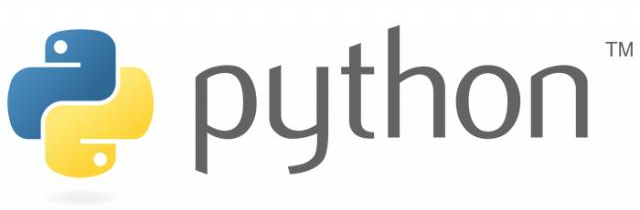

### Jupyterとは

機械学習やデータ分析のコミュニティで広く使われているレポート機能が付加されたプログラムの実行環境です。セルと呼ばれる単位でプログラムの実行が可能で、実行結果は即時、セルの下に出力されます。


## ここで学習すること

* Colaboratory Tips
* Pythonの基本文法（変数・リスト）
* Numpyの基礎
* Pandasの基礎
* Pythonの基本文法（選択・繰り返し・関数）
* Matplotlibの基礎
---


## Colaboratory Tips

ここでは、Google Colaboratoryを使う上で、知っていると便利な小技や裏技？をご紹介しながら、Jupyterベースの実行環境に慣れましょう。


### マシンリソースを調べる

ColaboratoryはLinuxベースの仮想マシンで動作していますので、Linuxに詳しい方なら各種コマンドを使って様々なことを行うことができます。ここではGoogleが用意してくれた仮想マシンのリソースを調べてみましょう。

なお、Colaboratoryのセル内からLinuxのコマンドを実行する場合、行頭に「!」を付けてください。

In [0]:
# OS情報
! cat /etc/os-release

**注釈：** セル内のコードを実行するには、いくつかの方法があります。
* セル左側の三角アイコンをクリックする
* Ctrl + Enterキーを押す（セルのフォーカスは移動しない）
* Shitf + Enterキーを押す（セルのフォーカスは下に移動する）
* 上部メニューの[ランタイム]から実行方法を選択する

In [0]:
# CPU
! cat /proc/cpuinfo

### GPUの利用

In [0]:
# GPU
! nvidia-smi

**注釈:** 初期状態では、GPUではなくCPUを利用しているので、上記のコードはエラーになります。  

GPUを使用する場合は、Colaboratoryのメニューから[ランタイム]→[ランタイムのタイプを変更]で変更できます。[ハードウェアアクセラレータ]の項目を、NoneからGPUに変更して、もう一度、上記のセルを実行してみましょう。

### 時間制限（90分と12時間）

大変便利なColaboratory環境ですが、利用時間に90分と12時間という2種類の制限がある点は注意が必要です。

* 90分制限・・・インスタンス（仮想マシン）が落ちます。  
⇒ つまり、変数に格納している情報や、importしたライブラリなどが全て忘れ去られます。  
（一旦ファイルとして保存したものは生き残ります。）

* 12時間制限・・・インスタンス（仮想マシン）が消えます。
⇒ つまり、コードと実行結果の情報のみが残り、他は全て消えます。  
（一旦ファイルとして保存したものも全て消え、コード実行前の状態に戻ります。）

12時間制限に至るまでの残り時間をチェックするには、以下のコマンドを実行してください。

In [0]:
!cat /proc/uptime | awk '{print $1 /60 /60 "hours"}'

**注釈:**上記のコマンドでは、インスタンスが起動してからの経過時間が出力されます。この値が、12hoursになるまで、インスタンスが利用可能です。

### セルの挿入と削除
Tipsの締めとして、セルを新たに挿入したり削除してみましょう。

セルの挿入は、画面上部の[＋コード] と [＋テキスト] で行えます。
* コード…Pythonを実行するためのセル（プログラム）
* テキスト…説明を記述するためのセル（Markdown記法）
  * 参考URL：[Markdown記法 サンプル集 - Qiita](https://qiita.com/tbpgr/items/989c6badefff69377da7)

セルの削除は、セル右側のゴミ箱アイコンで行えます。

---
## Pythonの基本文法（変数・リスト型）

ここではPythonの基本文法について演習を行います。と、いってもPythonの文法すべてを習得しようとすると膨大な時間がかかってしまいますので、ここでは今後の機械学習や深層学習の精度を左右するデータの前処理（データハンドリング）に必要となる要素に限定して演習をしてみましょう。

### データ型を調べる（type）
Pythonに限らず、プログラミングのデータは データ型 によって分類されています。例えば、1 というデータは int型(整数型)、3.14は float型(浮動小数点数型) 、"abc" は str型(文字列型) というように分類されます。データ型はtype()の()の中にデータを入れることで、そのデータのデータ型を確認することができます。


In [0]:
# 整数の場合
type(1)

In [0]:
# 小数の場合
type(1.1)

In [0]:
# 文字の場合
type("abc")

### 変数の定義（ = ）
Pythonに限らずプログラミング言語全般で、データを保存しておくための 変数 というものが用意されています。変数は最初の文字がアルファベットか_であれば自由に名前をつけることができます。変数に値を代入するときには = の演算子を使います。

In [0]:
num = 3

In [0]:
moji = "abc"

type()の()の中に変数名を入れることで、その変数のデータ型を確認できます。

In [0]:
type(num)

In [0]:
type(moji)

print()の()の中に変数名をいれると、変数に代入されたデータを表示することができます。

In [0]:
print(num)
print(moji)

printと同じような機能に、displayがあります。printはpython標準の命令（関数とも呼びます）ですが、displayはJupyterの機能になります。出力の違いを確認しつつ、今後は好みで使い分けてください。

TIPS: displayは後述するDataFrameの形を崩さずに出力できるため重宝します。

In [0]:
display(num)
display(moji)



**注釈:** Jupyterでは、わざわざprintを使用しなくても、セルの最終行に変数名を記述すると、変数の内容を表示することができます。ただし、セルの最終行に書いたもののみ有効ですので注意してください。

In [0]:
num

In [0]:
moji

In [0]:
# この場合、最終行のみ有効で、1行目は無効となる
num
moji

In [0]:
# 2つ以上の変数の内容を表示したい場合は、printかdisplayを使う
display( num )
display( moji )

### リスト型（list）

先ほどは変数にデータを保存しましたが、一つの変数に複数のデータを入れたい場合があります。そのときに使うのが リスト型（list)になります。

In [0]:
# リスト型の定義の仕方
lst = [10, 20, 30, 40, 50]

リストの中の各データを要素と呼びます。最初の要素には0、次の要素には1というように各要素にはインデックス（添字）と呼ばれる番号が自動的に振られています（インデックスの最初が0番から始まることに注意してください）そのインデックスを指定することで、リストの要素を取り出すことができます。  

In [0]:
# リストから3番目の要素を取り出す(3番目の要素の添字は2になる)
lst[2]

listの後半の要素を取得したい場合などは、-(マイナス) を使ってインデックスを指定することで、最後から○番目の値を取得することができます。

In [0]:
lst[-1]

また、スライシング（slicing）と呼ばれる方法で、複数のデータを取り出してくることができます。  


In [0]:
# 1番目から3番目までのデータを取り出す
lst[1: 4]

**注釈：** スライシングで範囲指定した際に、左端の要素は含みますが、右端の要素は含まれないことに注意してください。

In [0]:
# 最初から4番目の要素まで取り出す
lst[: 4]

In [0]:
# 3番目の要素から最後の要素まで取り出す
lst[2: ]

## Numpyの基礎

PythonにはNumpyという便利なライブラリがあります。
Numpyを利用すると、Python標準のリスト型に比べて、多次元配列のデータを効率よく扱うことができます。また、Numpyは標準偏差や分散といった統計量を出力してくれる関数が用意されており、科学技術計算の基盤となっています。

Numpyを利用するには、まず次のようにインポートを行います。


In [0]:
# Numpyライブラリを、npという別名で使用できるように宣言する
import numpy as np

### numpy.ndarray

Numpyには、ndarrayと呼ばれるデータ型が用意されています。
ndarrayは一見すると、Python標準のリスト型（list）と似ていますが、ベクトルや行列のように、内部の要素を一括して計算できる便利な機能があります。

In [0]:
# arrayを定義する
ary = np.array([1, 2, 3])
display( type(ary) )
display( ary )

In [0]:
# aryのすべての要素に5をかける
ary * 5

ちなみに同じことをPython標準のリスト型でやろうとすると、全く結果が異なることを確認してみましょう。

In [0]:
# リスト型の定義の仕方
lst = [1, 2, 3 ]
lst * 5

なお、前述の ary * 5 では、ary内部の値を更新していませんので、もう一度ary の中身を表示させると、[5,10,15]ではなく、[1,2,3]のままなのが確認できます。

In [0]:
ary

ary内部の値を更新するには、以下のように = を使って、新たな値を代入してあげる必要があります。この「値を更新したつもりで、実はしていなかった！」というミスは、プログラミングに慣れるまで（むしろ慣れていても）結構やりがちな失敗なので気をつけましょう。


In [0]:
ary = ary * 5
ary

### numpyでの基礎統計量
通常、標準偏差などを計算したい場合は自分で実装する必要がありますが、Numpyは基本的な統計量を計算する関数を用意しています。

In [0]:
# range関数で、0～9までの連続した整数値を生成する
ary = np.array(range(10))
ary

In [0]:
# aryの平均値
ary.mean()

In [0]:
# aryの分散
ary.var()

In [0]:
# aryの標準偏差
ary.std()

In [0]:
# aryの最小値
ary.min()

In [0]:
# aryの最大値
ary.max()

---

## Pandasの基礎

Pandasは、Pythonでのデータ分析ライブラリとして最も活用されているライブラリのひとつです。PandasはNumpyを基盤に、シリーズ（Series）とデータフレーム（DataFrame）というデータ型を提供します。

Pandasを利用するには、まず次のようにインポートを行います。

In [0]:
# Pandasライブラリを、pdという別名で使用できるように宣言する
import pandas as pd

### pandas.Series
ここまで、Python標準のリスト型（list）と、Numpyライブラリのndarrayを扱いましたが、Pandasライブラリにも同様の機能を有するシリーズ（Series）というデータ型があります。

In [0]:
srs = pd.Series([10, 20, 30, 40, 50])
srs

**共通点**

In [0]:
# list/ndarrayとの共通点① 添字を指定して任意の要素を取り出せる
srs.iloc[3]

In [0]:
# list/ndarrayとの共通点② スライシングが使える
srs.iloc[ 1 : 3 ]

**相違点**

In [0]:
# list/arrayと相違点① indexを指定できる
srs = pd.Series([10, 20, 30, 40, 50], index=["one", "two", "three", "four", "five"])
srs

In [0]:
# list/ndarrayと相違点② np.arrayよりも便利な機能（メソッド）が充実している ※詳細は後ほど
# 要約統計量を出力する
srs.describe()

**注釈:** NumpyとPandasの使い分けについて

NumpyはPythonで弱点とされてきた計算速度の遅さを克服しています。PandasはNumpyを利用して使いやすくしたライブラリです。
したがって、一般的にはPandasの方がNumpyを呼び出すオーバーヘッドが発生する分、直接、Numpyを利用したほうがパフォーマンスは上がりやすい傾向にあります。

数値演算の処理速度を最適化したい場合には、Pandasだけでは難しいかもしれません。ただし、Pnadas（特にこれからお話するDataFrame）は速度の面に若干目をつぶっても、余りある利点（使いやすさと機能の豊富さ）があります。

ですので、まずはPandasでトライしてみて、どうしても処理速度に問題があるようでしたら、NumpyやSQLを利用するという切り替えもありかと思います。

### pandas.DataFrame
Pandasライブラリで最も使われるデータ型にデータフレーム（DataFrame）があります。Seriesは1次元のデータしか扱えませんが、DataFrameは行列のような多次元のデータも扱えます。

####DataFrameの生成  
まずはサンプルデータを含んだ、DataFrameを生成してみます。

In [0]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df

#### indexとcolumnの指定

DataFrameはインデックス（index）やカラム（column）を指定することにより、Excelのシートのようにデータを扱うことができます。


In [0]:
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=["a", "b", "c"], columns=["A", "B", "C"])
df

#### indexとcolumn名の変更
pandas.DataFrame.renameを使うことで、行や列の名前を変更することが出来ます。

In [0]:
df.rename(columns={"A":"a"},index={"a":"A"})

**注釈:**DataFrameを扱うときに多いミスが「更新したつもり、だけど更新されてなかった」系の失敗です。実は上記のrenameは、その場限りのもので、もう一度、dfの中身を表示すると、更新されておらず困惑します（慣れている人でも、かなりありがちなミスです）

In [0]:
# 変更が反映されておらず、元に戻っている！
df

それを解決するには、主に２つの方法があります。

In [0]:
# inplaceオプションををtrueにする
df.rename(columns={"A": "a"},index={"a": "A"}, inplace=True)
df

In [0]:
# イコール( = )で新しい内容を同じdfに代入する
df  = df.rename(columns={"C": "c"},index={"c": "C"} )
df

#### データの消去

pandas.Series.dropは、列と行の削除を行うことが出来ます。デフォルトでは、行の削除(axis=0)を指定しています。

In [0]:
df.drop('C')
df

**注釈:**おっと、C行が削除されていませんね…　そうです、先ほどご紹介した「かなりありがちなミス」です。inplace=Trueオプションを付けて試してみましょう。

In [0]:
# inplaceオプションで、削除を反映させる
df.drop('C' , inplace=True)
df

In [0]:
# axis=1を指定することで、列を削除することが出来る。
df.drop('c', axis=1, inplace=True)
df

#### データの取得
pd.DataFrame.locとpd.DataFrame.ilocを使うことで、DataFrameの指定した行や指定した列を取得することができます。

In [0]:
# データフレームを再度作成する
df = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=["a", "b", "c"], columns=["A", "B", "C"])
df

In [0]:
# b行のデータを取得
df.loc["b"]

In [0]:
# C列のデータを取得
df.loc[ : , "C"]

In [0]:
# 0,1行目のデータを取得
df.iloc[ [0, 1] ]

In [0]:
# 1列目のデータを取得
df.iloc[ : , [1]]

#### データの表示
Dataframeにはheadとtailというメソッドが用意されています。headは先頭から指定した数の行データを表示します。tailは、末尾から指定した数の行データを表示します。

In [0]:
# head
df.head(2)

In [0]:
# tail
df.tail(2)

**注釈:**大量のデータを扱う場合、「まずは数行だけ…」を分析対象にしたい場合など、head(tail)は重宝しますので、覚えておきましょう。

#### 条件に応じた行の抽出
Dataframeにはqueryというメソッドが用意されています。文字列で条件をしてすることで、条件を満たした行だけを取り出すことができます。SQLに詳しい方は、SELECT～WHERE句をイメージすると分かりやすいかもしれません。

In [0]:
# データフレームの中身を確認
df

In [0]:
# B列が5の行を抽出
df.query('B == 5')

In [0]:
# B列が5以上の行を抽出
df.query('B >= 5')

In [0]:
# B列が5以上で、かつC列が7以上の行を抽出
df.query('B >= 5 & C >=7')

In [0]:
# A列が1、またはC列が9の行を抽出
df.query('A == 1 | C ==9')

## Pythonの基本文法（選択・繰り返し・関数）

今回の演習ではあまり使うことはありませんが、少し複雑な前処理や処理手順を組もうとした場合、選択（if）や、繰り返し（for）といった構文を使用します。  

現段階で理解する必要はありませんが、他のプログラム言語を習得している方向けに、Pythonでのifやforの記述法をご紹介します。


### 選択（if文）
if 文の使い方は以下の通りです。例えばJava言語では{ }で囲んでいた部分が、Pythonでは字下げによって行われていることに注意してください。

if 条件:  
　　実行したい文  
　　※ifの中の行は、必ずインテント（字下げ）が必要です  
  
  
インテントは半角スペース4個が推奨されていますが、任意の個数やTabでも正しく動きます（可読性を考慮すると、せめて社内やプロジェクト単位では統一すべきだと思いますが…）

In [0]:
lang = "python"
if lang == "python":
    # インテントされた部分がifの中身として認識される
    print("I love Python!")
    print("I love Programming!")

In [0]:
lang = "java"
if lang == "python":
    # インテントされた部分がifの中身として認識される
    print("I love Python!")
    print("I love Programming!")

**注釈:**上記は何も表示されません。これは、laung が "ruby"になったため、条件を満たしていないためです。

In [0]:
lang = "java"
if lang == "python":
    # インテントされた部分がifの中身として認識される
    print("I love Python!")
print("I love Programming!")

**注釈:**上記の例では、インテントしていない"I love Programming!"は、if文の動作とは全く関係なく実行されることになります。

ところで、lang が "python" 以外のときにもなにか実行したい場合があるとしましょう。そんなときに使うのが　else文 です。else 文は、if文の条件を満たさなかった場合に実行したい文を書くことができます。else文の使い方は、
  
if 条件:  
　　実行したい文  
  
else:  
　　実行したい文  

In [0]:
lang = "ruby"
if lang == "python":
    print("I love python!")
else:
    print("I love other language!")

### 繰り返し(for文)

同じ処理を繰り返したい場合は、for文を使用します。他の言語に比べると、繰り返し条件の記述に独特の部分があるので、以下を実行例を参考にしてください。

for 変数 in リスト型:  
　　繰り返したいしたい文  
　　※ifと同様に、for中の行は、必ずインテント（字下げ）が必要です 

In [0]:
# xを0から4まで増分させながら繰り返す
for x in [0, 1, 2, 3, 4]:
    print(x)

上記のような繰り返し条件の指定では、例えば0から100までの値を実行したいような場合に、リスト型で100まで定義するのは現実的ではありません。そのような際に使うのがrangeです。rangeの使い方は以下の通りです。


In [0]:
# xを0から4まで増分させながら繰り返す
for x in range(5):
    print(x)

In [0]:
# xを2から4まで増分させながら繰り返す
for x in range(2, 5):
    print(x)

In [0]:
# xを0から9まで2ずつ増分させながら繰り返す
for x in range(0, 9, 2):
    print(x)

#### 参考：for文とDataFrame
著者の経験ですが、for文で、DataFrameから1行ずつ行を取り出して、その1行に対して何か処理を行いたいときが結構あります。この段階で覚える必要はありませんが、何かの際にここに書いてあったことを思い出してください。ただし、何万件もの行をfor文で取り出そうとすると、滅茶苦茶な処理時間がかかりますので、まずはqueryメソッドなどで取り出す件数を絞ってから、for文に与えるようにしましょう。


In [0]:
# データフレームを作成する
# サンプルデータ：気温(℃)とアイスクリームの売上(個)の関係
df = pd.DataFrame([ [10,20],[15,30],[15,40],[25,70],[30,100] ], columns=["気温", "売上"])
df

In [0]:
# データフレームから一行ずつ取り出す
for index,row in df.iterrows():
    kion   = row['気温']
    uriage = row['売上']
    print( kion )
    print( uriage )

In [0]:
# おまけ：上記のprintをformatメソッドで見やすくする
for index,row in df.iterrows():
    kion   = row['気温']
    uriage = row['売上']
    print( '気温が{}℃の日は、アイスクリームの売上は{}個でした'.format( kion , uriage ) )

### 関数の定義（def）

Pythonに限らず、多くのプログラミング言語に関数（サブルーチン、メソッドとも）というものがあります。関数は数学で扱うように「何かの値を入れると、何らかの値を出力する」という役目がありますが、プログラミングの場合には、それと同時に「いくつかのまとまった処理をひとまとめにする」という役割もあります。Pythonでの関数の定義の方法は以下の通りです。
  
  
def 関数名(仮引数):  
　　実行したい文1    
　　実行したい文2  
　　実行したい文3  
　　return 出力したい値  

In [0]:
# x * y を 計算する関数を定義する（関数名:calc）
def calc( x , y ):
    result = x * y
    return result

**注釈:**上記のセルでは、関数を定義しただけですので、実行しても何も出力されません。関数を動作させるには、この関数に対して、xとyの値を渡して実行する必要があります。なお、厳密にはこのとき関数を定義する際に()内に設定する変数を仮引数、 関数を実行する際に入れる実際の値を引数といって区別します（が、そこまでこだわらなくても今は大丈夫です）

In [0]:
# 関数calcを実行する（引数は4と5）
calc(4,5)

関数からの出力（これを戻り値と呼びます。関数の最後でreturn文により指定された値です）は、変数に格納することもできます。


In [0]:
# 戻り値を変数（kakezan1と2）に代入する
kakezan1 = calc(5,5)
kakezan2 = calc(10,10)

print( kakezan1 + kakezan2 )

## Matplotlibの基礎
データを分析する際に、値を見るだけでは全体像を捉えにくいので、まずはグラフで描画して俯瞰することが多いです。ここでは、Pythonでよく利用されるグラフ描画のライブラリであるMatplotlibの簡単な使い方をご紹介します。

In [0]:
# Matplotlibライブラリを、pltという別名で使用できるように宣言する
import matplotlib.pyplot as plt

In [0]:
# データフレームを作成する
# サンプルデータ：気温(℃)とアイスクリームの売上(個)の関係
df = pd.DataFrame([ [10,20],[15,30],[15,40],[25,70],[30,100] ], columns=["気温", "売上"])
df

### 散布図

In [0]:
# 散布図1
plt.figure()
plt.scatter(x=df['気温'], y=df['売上'])
plt.xlabel('KION')
plt.ylabel('URIAGE')
plt.show()

In [0]:
# 散布図2
plt.figure()
plt.scatter(x=df['売上'], y=df['気温'])
plt.xlabel('URIAGE')
plt.ylabel('KION')
plt.show()

### 様々なグラフ
Matplotlibは、散布図の他にも、ヒストグラム、折れ線、箱ひげ図、ヒートマップなど様々な様式のグラフに対応しています。また、オプションも数多く用意されていますが、ここではいくつかグラフの種類を変えて試してみましょう（あくまでグラフ描画の練習ですので、グラフとしてあまり意味をなしていないものもありますが、ご了承ください）

In [0]:
# ヒストグラム
plt.figure()
plt.hist(df['気温'])
plt.xlabel('KION')
plt.show()

In [0]:
# 折れ線
plt.figure()
plt.plot(df['気温'])
plt.ylabel('KION')
plt.show()

In [0]:
# 円グラフ
plt.figure()
plt.pie(df['売上'],labels=df['気温'])
plt.show()

### 参考：文字化け□□対策
Colabratory環境でMatplotlibを使用すると、ラベルの部分の全角文字が文字化け□□になってしまいます。そのため、基本的には講義では半角文字でラベル付けをしていきますが、「どうしても日本語がいい！」という人のために、Mini Tipsとして、Matplotlibの日本語対応の方法についてご紹介します。

In [0]:
# 文字化けしてしまう例
plt.figure()
plt.scatter(x=df['気温'], y=df['売上'])
plt.title('気温とアイスクリームの関係')
plt.xlabel('気温(℃)')
plt.ylabel('売上(個)')
plt.show()

**注釈:**たくさんのRuntimeWaarningが出力されて、実行結果は□□だらけになることが確認できます。

これを回避するには、いくつかの段階を踏む必要があります（少し手間がかかります）  

まず、日本語用のフォントを apt-getコマンドでダウンロードして、不要なキャッシュを削除します。


In [0]:
# 日本語フォントをダウンロードする。
! apt-get -y install fonts-ipafont-gothic

# キャッシュを削除する。
# 削除すべきキャッシュのファイル名は、Matplotlibがバージョンアップすると変わるため、
# 下記のrmでうまく行かない場合、! ls -ll /root/.cache/matplotlib/ でファイル名を確認
# 旧ファイル名：! rm /root/.cache/matplotlib/fontList.json
# 旧ファイル名：! rm /root/.cache/matplotlib/fontlist-v300.json

! rm /root/.cache/matplotlib/fontlist-v310.json   # 2019/10/31段階でのファイル名

**注釈:**ダウンロードのバーが何回か出力された後に、処理が停止したら、次のステップへ進みます（20～30秒程度）

次は日本語フォントをColaboratoryに反映させるため、以下の手順でランタイムを再起動します。
* Colaboraryの上部メニュー → [ランタイム] → [ランタイムを再起動]

画面の右上が一瞬「再起動中」→「初期化中」となり、その後に「RAM」「ディスク」のバーが表示されたら、再起動は完了です（5秒程度）  

続いて、以降のセルを実行してグラフを描画します。なお、ランタイムを再起動しましたので、もう一度、各ライブラリのimportと、DataFrameの生成を行う必要があります。


In [0]:
# ライブラリをインポートする
import pandas as pd
import matplotlib.pyplot as plt

# データフレームを作成する
# サンプルデータ：気温(℃)とアイスクリームの売上(個)の関係
df = pd.DataFrame([ [10,20],[15,30],[15,40],[25,70],[30,100] ], columns=["気温", "売上"])

In [0]:
# 日本語フォントの設定
import seaborn as sns
sns.set(font='IPAGothic')

In [0]:
plt.figure()
plt.scatter(x=df['気温'], y=df['売上'])
plt.title('気温とアイスクリームの関係')
plt.xlabel('気温(℃)')
plt.ylabel('売上(個)')
plt.show()

**注釈:**お疲れ様でした。以上、少し手間はかかりますが、見やすくなりました。日本語化したい場合は、この一連の流れをプログラム冒頭のセルで「おまじない」的に実行してしまうのも手かもしれません。

---
## まとめ

ここでは、以下のことを学習しました。

* Colaboratory Tips
* Pythonの基本文法（変数・リスト）
* Numpyの基礎
* Pandasの基礎
* Pythonの基本文法（選択・繰り返し・関数）
* Matplotlibの基礎
---
